In [1]:
import numpy as np
import pandas as pd

In [4]:
#cargar el dataset
data = pd.read_csv("dataS10.csv")

In [5]:
#forma del dataset 1770 tuplas con 5 columnas
data.shape

(1770, 5)

In [6]:
#5 primeras filas
data.head()

,Console,Title,Usedprice,Review Score,US Sales (millions)
0,Nintendo DS,Super Mario 64 DS,24.95,85,4.69
1,Sony PSP,Lumines: Puzzle Fusion,14.95,89,0.56
2,Nintendo DS,WarioWare Touched!,22.95,81,0.54
3,Sony PSP,Hot Shots Golf: Open Tee,12.95,81,0.49
4,Nintendo DS,Spider-Man 2,14.95,61,0.45


### Normalizacion

In [7]:
def normalizacionColumna(df, i):
    columns = df.columns.values
    df[columns[i]] = (df[columns[i]] - data[columns[i]].min()) / (df[columns[i]].max() - data[columns[i]].min())

In [8]:
def normalizarDataset(data, indices):
    df = data.copy()
    for i in indices:
        normalizacionColumna(df, i)
    return df

In [9]:
k = 10
indices = [2,3,4]
data = normalizarDataset(data, indices)
data.head(k)

,Console,Title,Usedprice,Review Score,US Sales (millions)
0,Nintendo DS,Super Mario 64 DS,0.173913,0.848837,0.319454
1,Sony PSP,Lumines: Puzzle Fusion,0.086957,0.895349,0.037543
2,Nintendo DS,WarioWare Touched!,0.156522,0.802326,0.036177
3,Sony PSP,Hot Shots Golf: Open Tee,0.069565,0.802326,0.032765
4,Nintendo DS,Spider-Man 2,0.086957,0.569767,0.030034
5,Nintendo DS,The Urbz: Sims in the City,0.069565,0.639535,0.027304
6,Sony PSP,Ridge Racer,0.130435,0.883721,0.023891
7,Sony PSP,Metal Gear Ac!d,0.113043,0.732558,0.022526
8,Nintendo DS,Madden NFL 2005,0.034783,0.651163,0.016382
9,Nintendo DS,Pok�mon Dash,0.173913,0.395349,0.014334


### Weighted Average

In [10]:
def weightedAverage(data, w, l):
    df = data.copy()
    columns = df.columns.values
    wa = np.zeros(df.shape[0])
    for i in range(len(l)):
        wa += (w[i] * df[columns[l[i]]]) / sum(w)
    df['wa'] = wa
    df = df.sort_values(by=['wa'], ascending=False)
    return df

In [11]:
pesos = [1,2,1]
dfWA = weightedAverage(data, pesos, indices)
dfWA.head(k)

,Console,Title,Usedprice,Review Score,US Sales (millions),wa
984,Nintendo Wii,Rock Band 2,1.000000,0.930233,0.065529,0.731499
1379,X360,Call of Duty: Modern Warfare 2,0.373913,0.953488,0.587031,0.716980
1376,Nintendo Wii,Wii Sports Resort,0.304348,0.790698,0.946075,0.707955
1377,Nintendo Wii,New Super Mario Bros. Wii,0.304348,0.872093,0.774061,0.705649
23,Nintendo DS,Mario Kart DS,0.217391,0.918605,0.681229,0.683957
932,Nintendo Wii,Mario Kart Wii,0.217391,0.813953,0.845051,0.672587
174,Nintendo DS,New Super Mario Bros.,0.200000,0.895349,0.683959,0.668664
1380,PlayStation 3,Call of Duty: Modern Warfare 2,0.391304,0.953488,0.337201,0.658871
468,X360,Halo 3,0.173913,0.953488,0.547440,0.657083
470,Nintendo Wii,Super Mario Galaxy,0.304348,0.988372,0.336519,0.654403


### Maximin

In [12]:
def maximin(data, l):
    df = data.copy()
    columns = df.columns.values
    t = df.shape[0]
    mn = np.zeros(df.shape[0])
    for i in range(t):
        mn[i] = df[columns[l[0]]][i]
        for j in range(1,len(l)):
            if mn[i] > df[columns[l[j]]][i]:                
                mn[i] = df[columns[l[j]]][i]
    df['minVal'] = mn
    #print(mn)
    df = df.sort_values(by=['minVal'], ascending=False)
    return df

In [13]:
dfMM = maximin(data, indices)
dfMM.head(k)

,Console,Title,Usedprice,Review Score,US Sales (millions),minVal
1379,X360,Call of Duty: Modern Warfare 2,0.373913,0.953488,0.587031,0.373913
1380,PlayStation 3,Call of Duty: Modern Warfare 2,0.391304,0.953488,0.337201,0.337201
470,Nintendo Wii,Super Mario Galaxy,0.304348,0.988372,0.336519,0.304348
1377,Nintendo Wii,New Super Mario Bros. Wii,0.304348,0.872093,0.774061,0.304348
1376,Nintendo Wii,Wii Sports Resort,0.304348,0.790698,0.946075,0.304348
934,Nintendo Wii,Super Smash Bros.: Brawl,0.304348,0.941860,0.389078,0.304348
472,Nintendo Wii,Mario Party 8,0.304348,0.581395,0.261433,0.261433
1383,Nintendo DS,Pok�mon SoulSilver,0.260870,0.872093,0.253242,0.253242
1382,Nintendo DS,Pok�mon HeartGold,0.243478,0.872093,0.253242,0.243478
1381,X360,Halo 3: ODST,0.243478,0.825581,0.296928,0.243478


### Leximin

In [14]:
def leximin(data, l):
    df = data.copy()
    columns = df.columns.values
    t = df.shape[0]
    lex = [np.zeros(df.shape[0]) for i in range(len(l))]
    a = [[]  for i in range(len(l))]
    for i in range(t):
        for j in range(len(l)):
            a[j] = df[columns[l[j]]][i]
        a.sort()
        for j in range(len(l)):
            lex[j][i] = a[j]
    for j in range(len(l)):
        df['c' + str(j)] = lex[j]
    c = ['c' + str(i) for i in range(len(l))]
    df = df.sort_values(by=c, ascending=False)
    return df

In [15]:
dfLM = leximin(data, indices)
dfLM.head(k)

,Console,Title,Usedprice,Review Score,US Sales (millions),c0,c1,c2
1379,X360,Call of Duty: Modern Warfare 2,0.373913,0.953488,0.587031,0.373913,0.587031,0.953488
1380,PlayStation 3,Call of Duty: Modern Warfare 2,0.391304,0.953488,0.337201,0.337201,0.391304,0.953488
1376,Nintendo Wii,Wii Sports Resort,0.304348,0.790698,0.946075,0.304348,0.790698,0.946075
1377,Nintendo Wii,New Super Mario Bros. Wii,0.304348,0.872093,0.774061,0.304348,0.774061,0.872093
934,Nintendo Wii,Super Smash Bros.: Brawl,0.304348,0.941860,0.389078,0.304348,0.389078,0.941860
470,Nintendo Wii,Super Mario Galaxy,0.304348,0.988372,0.336519,0.304348,0.336519,0.988372
472,Nintendo Wii,Mario Party 8,0.304348,0.581395,0.261433,0.261433,0.304348,0.581395
1383,Nintendo DS,Pok�mon SoulSilver,0.260870,0.872093,0.253242,0.253242,0.260870,0.872093
1381,X360,Halo 3: ODST,0.243478,0.825581,0.296928,0.243478,0.296928,0.825581
1382,Nintendo DS,Pok�mon HeartGold,0.243478,0.872093,0.253242,0.243478,0.253242,0.872093


### Skylines

In [16]:
def ParetoDomina(a,b):
    mi = len([1 for i in range(len(a)) if a[i] >= b[i]])
    my = len([1 for i in range(len(a)) if a[i] > b[i]])
    if mi == len(a):
        if my > 0:
            return True
    return False

In [17]:
def skylines(data, l):
    df = data.copy()
    columns = df.columns.values
    t = df.shape[0]
    for i in range(t):
        if i in df.index:
            a = [0] * len(l)
            for j in range(i + 1, t):
                if j in df.index:
                    b = [0] * len(l)
                    for k in range(len(l)):
                        a[k] = df[columns[l[k]]][i]
                        b[k] = df[columns[l[k]]][j]
                    if ParetoDomina(a,b):
                        df = df.drop(j)
                    elif ParetoDomina(b,a):
                        df = df.drop(i)
                        break
    return df

In [18]:
dfSky = skylines(data, indices)
dfSky

,Console,Title,Usedprice,Review Score,US Sales (millions)
23,Nintendo DS,Mario Kart DS,0.217391,0.918605,0.681229
173,Nintendo Wii,Wii Play,0.086957,0.534884,1.000000
174,Nintendo DS,New Super Mario Bros.,0.200000,0.895349,0.683959
470,Nintendo Wii,Super Mario Galaxy,0.304348,0.988372,0.336519
932,Nintendo Wii,Mario Kart Wii,0.217391,0.813953,0.845051
933,X360,Grand Theft Auto IV,0.173913,1.000000,0.392491
984,Nintendo Wii,Rock Band 2,1.000000,0.930233,0.065529
1376,Nintendo Wii,Wii Sports Resort,0.304348,0.790698,0.946075
1377,Nintendo Wii,New Super Mario Bros. Wii,0.304348,0.872093,0.774061
1379,X360,Call of Duty: Modern Warfare 2,0.373913,0.953488,0.587031


### Graficos

In [19]:
import matplotlib.pyplot as plt
from math import pi

In [20]:
def radarPlot(df, row, categorias, color,title):
    N = len(categorias)
    #repetir el primer valor para tener una figura cerrada (poligono)
    valores = df.loc[df.index[row]].values[categorias].flatten().tolist()    
    valores += valores[:1]
    #calcular el angulo
    angulos = [n / float(N) * 2 * pi for n in range(N)]
    angulos += angulos[:1]
    #inicializar el plot
    ax = plt.subplot(3, 2, row + 1, polar=True, )
    # primer eje arriba:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    #un eje por atributo + etiquetas
    etiquetas = [df.columns[i] for i in categorias]
    plt.xticks(angulos[:-1], etiquetas, color='grey', size=8)
    ax.set_rlabel_position(0)
    #dibujar ticks de los ejes
    tic = 5
    plt.yticks([i * (1.0 / tic) for i in range(1,tic)], [str(i * (1.0 / tic)) for i in range(1,tic)], color="grey", size=7)
    plt.ylim(0,1)
    #plotear
    ax.plot(angulos, valores, color=color, linewidth=2, linestyle='solid')
    ax.fill(angulos, valores, color=color, alpha=0.4)
    plt.title(title, size=11, color=color, y=1.1)
def radarAllPlot(df,categorias):
    my_dpi=96
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set2", len(df.index))
    for i in range(len(df.index)):
        #print(df.columns[1])
        #print()
        radarPlot(df,i,categorias,my_palette(i), df[df.columns[1]][df.index[i]])
        #radarPlot(df,i,categorias,my_palette(i), df["Title"][i])

### Weigthed Average

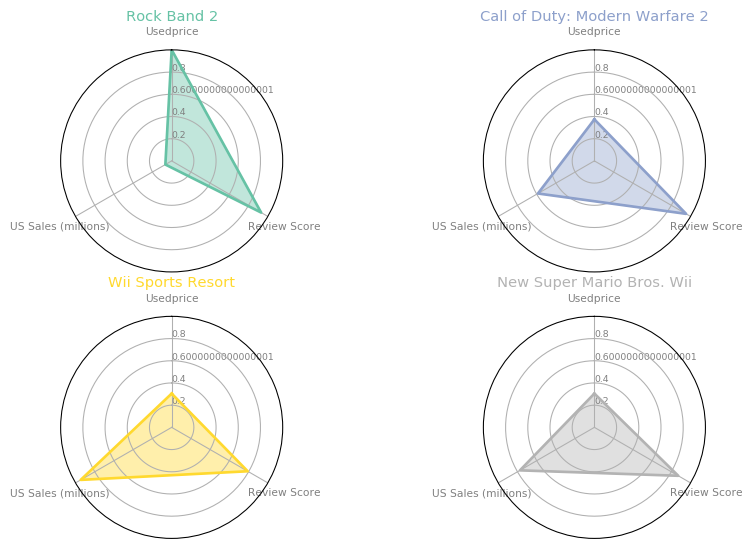

In [21]:
#4 primeros juegos segun WA
radarAllPlot(dfWA.head(4),indices)

### MaxiMin

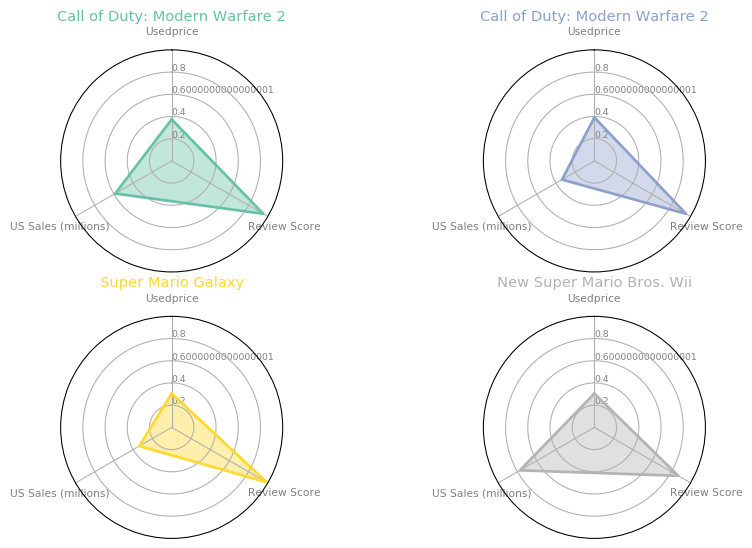

In [22]:
#4 primeros juegos segun MM
radarAllPlot(dfMM.head(4),indices)

### Leximin

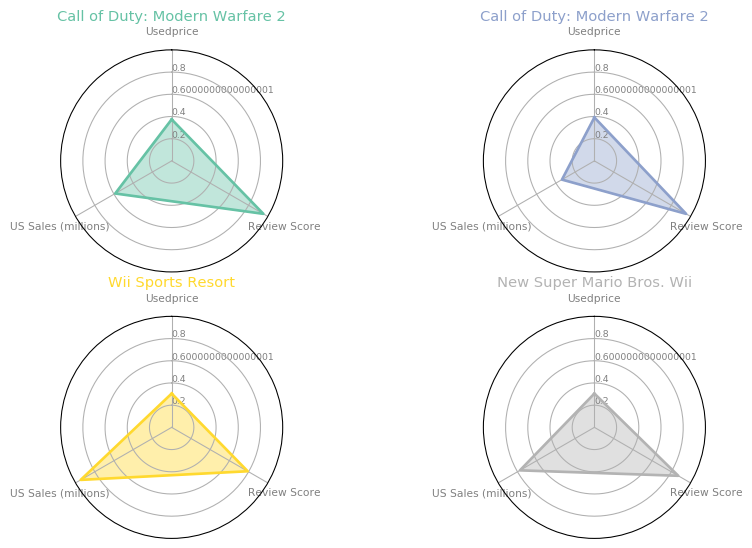

In [23]:
#4 primeros juegos segun MM
radarAllPlot(dfLM.head(4),indices)

### Skylines

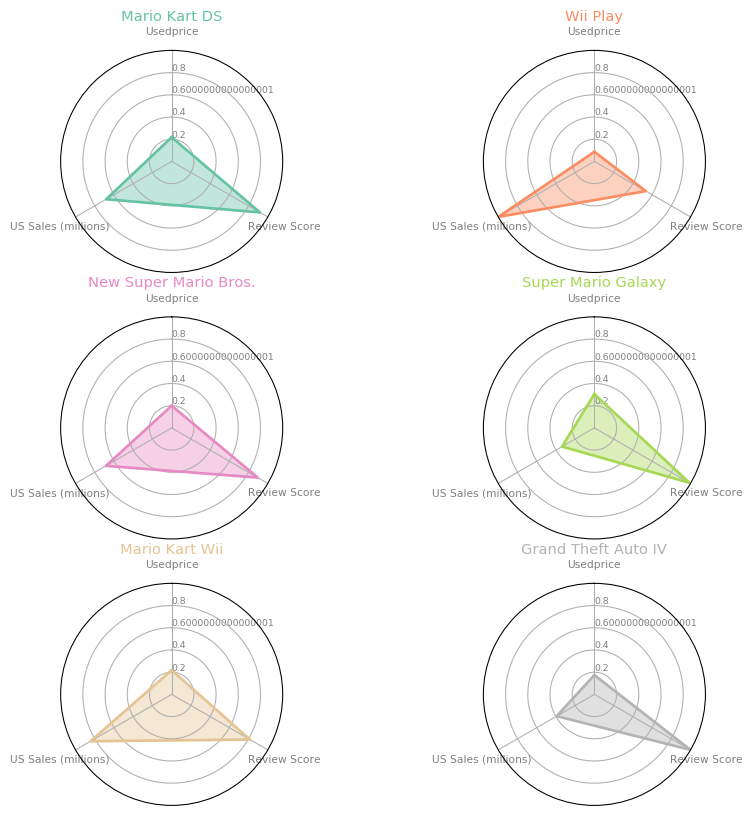

In [24]:
#los 6 skylines juegos
radarAllPlot(dfSky.head(6),indices)